# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Dewa Made Adrian Pramadipta]
- **Email:** [adriantriyasa@gmail.com]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimanakah perbedaan penggunaan sepeda di setiap harinya?
- Apa jam sibuk dan jam sepi dalam penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [44]:
day_df = pd.read_csv("data//day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [45]:
hour_df = pd.read_csv("data//hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- data day dan hour merupakan data yang sama hanya saja data hour menampilkan lebih rinci seberapa banyak sepeda digunakan per jamnya dalam satu hari


### Assessing Data

In [46]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [47]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [48]:
print("duplikasi:",day_df.duplicated().sum())
day_df.describe()

duplikasi: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [49]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [50]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [51]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua data tidak memiliki Missing Value, Duplicate Data, Maupun Inaccurate value.
- Dikarenakan kita ingin memvisualisasikan penggunaan sepeda per harinya, format data weekday akan kita ganti menjadi nama hari


### Cleaning Data

In [52]:
day_mapping = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
day_df['weekday'] = hour_df['weekday'].map(day_mapping)
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Saturday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Saturday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,Saturday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,Saturday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dikarenakan hanya data day yang akan digunakan untuk memvisualisasikan korelasi hari dan penggunaan sepeda, hanya data day yang format harinya diganti


## Exploratory Data Analysis (EDA)

### Explore ...

In [53]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,NaN,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,NaN,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,NaN,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [55]:
day_df.groupby('weekday').agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
            max   min         mean          std
weekday                                        
Friday     8227   627  5240.279570  1559.781049
Monday     7852    22  4264.017094  1915.033663
Saturday   8714   683  4472.949153  2297.300623
Sunday     8294   431  4442.564103  2352.620642
Thursday   8362  2416  4936.202532  1231.237093
Tuesday    7592  1115  4309.349515  1765.143052
Wednesday  8173   441  4086.846154  1707.383184

In [58]:
hour_df.groupby('hr').agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

**Insight:**
- Kita sudah mengexplore penggunaan sepeda setiap hari dan jamnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimanakah perbedaan penggunaan sepeda di setiap harinya?

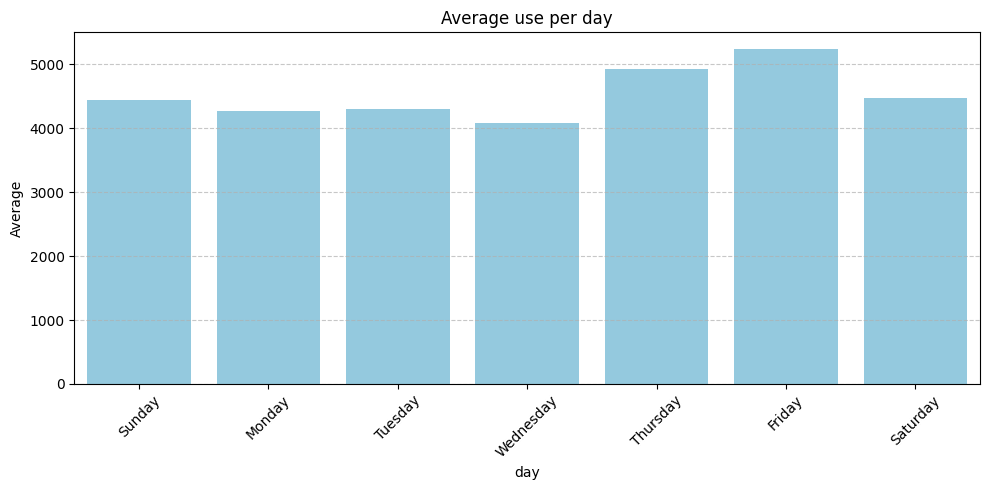

In [72]:
daily_avg_use = day_df.groupby('weekday')['cnt'].mean().reset_index()

days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_avg_use['weekday'] = pd.Categorical(daily_avg_use['weekday'], categories=days_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='cnt', data=daily_avg_use, color='skyblue')
plt.title('Average use per day')
plt.xlabel('day')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Terlihat menurut tren jumat merupakan hari dimana orang paling sering menggunakan sepeda

### Pertanyaan 2: Apa jam sibuk dan jam sepi dalam penggunaan sepeda?

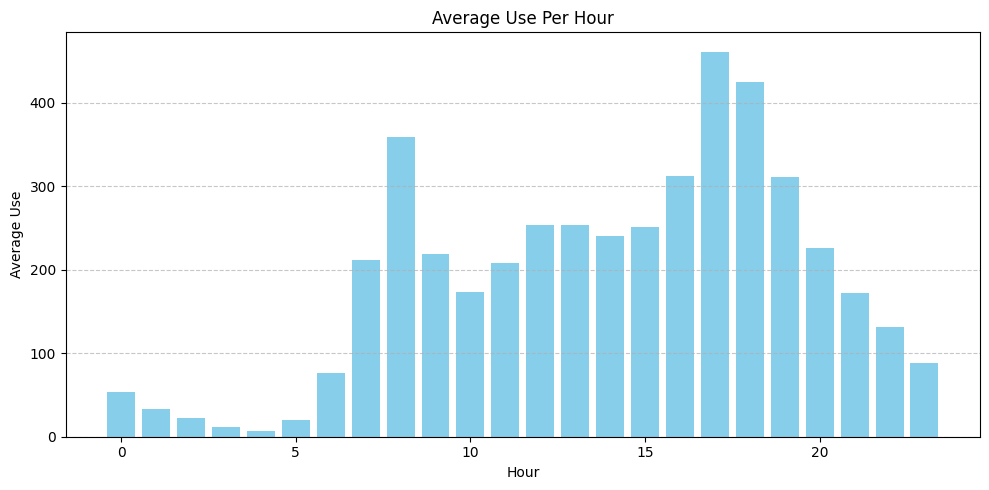

In [74]:
hourly_avg_use = hour_df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(hourly_avg_use['hr'], hourly_avg_use['cnt'], color='skyblue')
plt.title('Average Use Per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Use')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Bisa terlihat terdapat dua spike di jam 8 pagi dan di jam 5 sore (17)

**Insight:**
- Menurut Tren hari paling tinggi adalah di hari jumat
- Menurut Tren Jam paling sering adalah di jam 17 atau jam 5 sore

## Conclusion

- Kesimpulan dari hasil analisa data terhadap pertanyaan 1 adalah hari tidak terlalu memengaruhi penggunaan sepeda orang-orang, hal ini dibuktikan oleh rata-rata penggunaan harian yang mirip dan tidak berbeda
- Kesimpulan dari hasil analisa data terhadap pertanyaan 2 adalah jam sangat memengaruhi penggunaan sepeda orang-orang, terlihat orang lebih senang menggunakan sepeda di sore hari jam 16-19 atau jam 4 sore sampai 7 malam, selain itu terdapat spike penggunaan di jam 8 dan 17, ini bisa jadi berkolerasi dengan jam orang berangkat dan pulang kerja namun tetap perlu dilakukan analisis data lebih lanjut untuk mengkonfirmasi asumsi tersebut

## Saving the modified dataset

In [80]:
final_day = day_df.copy()
final_hour = hour_df.copy()

final_day.to_csv("dashboard//final_day.csv")
final_hour.to_csv("dashboard//final_hour.csv")